# Coursera Capstone Project - The Battle of Neighborhoods (Week 2)

### Aulia V. Suraperwata

### Contents

1. Introduction Section : Discussion of the business problem and the interested audience in this project.
2. Data Section: Description of the data that will be used to solve the problem and the sources.
3. Methodology section : Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
4. Results section : Discussion of the results.
5. Discussion section : Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
6. Conclusion section : Report Conclusion.

## 1. Introduction Section :
### Description of the Problem and Background


I currently live in Jakarta, Indonesia within walking distance to Sudirman CBD with MRT station. I enjoy many ammenities and venues in the area, such as various international cousine restaurants, cafes, food shops and entertainment. I have been offered a great opportunity to work for a tech company in Manhattan, NY. I am very excited and I want to use this opportunity to practice my learnings in Coursera in order to answer relevant questions arisen. The key question is : How can I find a convenient and enjoyable place similar to mine now in Jakarta? Certainly, I can use available real estate apps and Google but the idea is to use and apply myself the learned tools during the course. In order to make a comparison and evaluation of the rental options in Manhattan NY, I must set some basis, therefore the apartment in Manhattan must meet the following demands:

- apartment must be 2 or 3 bedrooms
- desired location is near a metro station in the Manhattan area and within 1.0 mile (1.6 km) radius
- price of rent not exceed $7000 per month
- top ammenities in the selected neighborhood shall be similar to current residence
- desirable to have venues such as coffee shops, restaurants Asian Thai, wine stores, gym and food shops

### Business Problem:

The challenge is to find a suitable apartment for rent in Manhattan NY that complies with the demands on location, price and venues. The data required to resolve this challenge is described in the following section 2, below.

### Interested Audience

I believe this is a relevant challenge with valid questions for anyone moving to other large city in US, EU or Asia. The same methodology can be applied in accordance to demands as applicable. This case is also applicable for anyone interested in exploring starting or locating a new business in any city. Lastly, it can also serve as a good practical exercise to develop Data Science skills.

## 2. Data Section :
### Description of the data and its sources that will be used to solve the problem


#### Description of the Data:
The following data is required to answer the issues of the problem:

- List of Boroughs and neighborhoods of Manhattan with their geodata (latitude and longitude)
- List of Subway metro stations in Manhattan with their address location
- List of apartments for rent in Manhattan area with their addresses and price
- Preferably, a list of apartment for rent with additional information, such as price, address, area, number of beds, etc
- Venues for each Manhattan neighborhood ( than can be clustered)
- Venues for subway metro stations, as needed

#### How the data be used to solve the problem:
The data will be used as follows:

- Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB)
- Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately
- Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations.
create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area.
- Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
- Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

The procesing of these DATA will allow to answer the key questions to make a decision:

- What is the cost of rent (per square ft) around a mile radius from each subway metro station?
- What is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

## 3. Methodology Section :

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

### The Analysis and The Strategy:

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Jakarta. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

### METHODOLOY EXECUTION - Mapping Data

#### Jakarta Map - Current residence and venues in neighborhood
for comparison to future Manhattan renting place

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


#!pip install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

     |████████████████████████████████| 92kB 6.4MB/s eta 0:00:011
Libraries imported.


In [2]:
CLIENT_ID = 'BTEZEW1BETUIWD4GIQQHJEDZYJEXUUQCUJFUBP0RIXK1V4HN'
CLIENT_SECRET = 'ANHQNPTDB3AHJNQYQ1QAG405YV3P3GT0NXKL4KBOFG5QMLLX'
VERSION = '20200414'
LIMIT = 30
radius = 500

In [3]:
latitude = -6.226128
longitude = 106.8047086

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BTEZEW1BETUIWD4GIQQHJEDZYJEXUUQCUJFUBP0RIXK1V4HN&client_secret=ANHQNPTDB3AHJNQYQ1QAG405YV3P3GT0NXKL4KBOFG5QMLLX&v=20200414&ll=-6.226128,106.8047086&radius=500&limit=30'

In [4]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

In [5]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [6]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(30, 4)

In [7]:
# Venues near current Jakarta residence place
SGnearby_venues.head(10)

,name,categories,lat,lng
0,Grand Lucky Superstore,Supermarket,-6.227147,106.805857
1,JKT48 Theater,Theater,-6.224660,106.804126
2,Miu 美卯 Summitmas Building,Japanese Restaurant,-6.226795,106.804059
3,Mr. Fox,Restaurant,-6.226240,106.806905
4,THE GOODS DINER •,Lounge,-6.226379,106.806915
5,Pand'Or,Bakery,-6.225747,106.806912
6,Hanamasa,Japanese Restaurant,-6.224271,106.804089
7,Manila Connexion,Filipino Restaurant,-6.224765,106.804313
8,FABLE,Bar,-6.226228,106.807451
9,fX Sudirman,Shopping Mall,-6.224574,106.803960


#### Map of Jakarta with venues in neighborhood

In [8]:
# create map of Jakarta place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

#### Data and Mapping of Manhattan Neighborhoods

Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [20]:
# Read csv file with clustered neighborhoods with geodata
manhattan_data  = pd.read_excel('https://github.com/auliavs/Coursera_Capstone/blob/master/mh_neigh_data.xlsx?raw=true','Sheet1', index_col=None, na_values=['NA']) 
manhattan_data

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,4087655077879960,-7391065965862980,2
1,Manhattan,Chinatown,4071561842231430,-7399427936255970,2
2,Manhattan,Washington Heights,4085190252555300,-7393690027985230,4
3,Manhattan,Inwood,4086768396449910,-7392121042203890,3
4,Manhattan,Hamilton Heights,40823604284811904,-7394968791883360,0
5,Manhattan,Manhattanville,408169344294978,-739573853935188,3
6,Manhattan,Central Harlem,4081597606742410,-7394321112603900,2
7,Manhattan,East Harlem,4079224946663030,-7394418223148520,4
8,Manhattan,Upper East Side,40775638573301800,-7396050763135,0
9,Manhattan,Yorkville,40775929849884800,-7394711784471820,2


### Manhattan Borough neighborhoods - data with top 10 clustered venues

In [21]:
manhattan_merged  = pd.read_excel('https://github.com/auliavs/Coursera_Capstone/blob/master/manhattan_merged.xlsx?raw=true','Sheet1', index_col=None, na_values=['NA']) 
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,4087655077879960,-7391065965862980,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,4071561842231430,-7399427936255970,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,4085190252555300,-7393690027985230,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,4086768396449910,-7392121042203890,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40823604284811904,-7394968791883360,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


#### Map of Manhattan neighborhoods with top 10 clustered venues
Identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [22]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

#### Examine a particular Cluster - print venues

After examining several cluster data , I concluded that cluster # 2 resembles closer the Jakarta place, therefore providing guidance as to where to look for the future apartment.

Assign a value to 'kk' to explore a given cluster.

In [23]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


#### Map of Manhattan places for rent

Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.

In [25]:
# csv files with rental places with basic data but still wihtout geodata ( latitude and longitude)
# pd.read_csv(' le.csv', header=None, nrows=5)
mh_rent  = pd.read_excel('https://github.com/auliavs/Coursera_Capstone/blob/master/MH_flats_price.xlsx?raw=true','Sheet1', index_col=None, na_values=['NA']) 
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,0.148611,05:00:00,3400,10000,407997711,-739662127
1,East 97th Street,Upper East Side,03:57:00,03:00:00,2100,7500,407885847,-739552767
2,West 105th Street,Upper West Side,0.103472,04:00:00,2800,5300,407997711,-739662127
3,CARMINE ST.,West Village,03:03:00,02:00:00,1650,5000,40730523,-740018726
4,171 W 23RD ST.,Chelsea,03:45:00,02:00:00,1450,5000,407441181,-739952986


#### Manhattan Apartment Rent Price Statistics

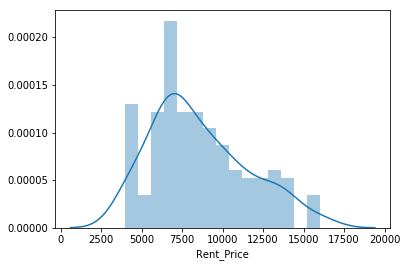

In [29]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)


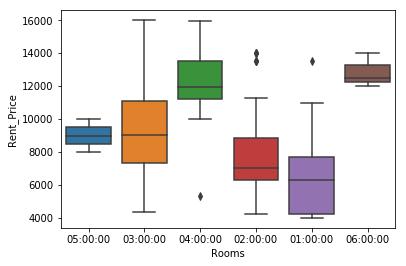

In [28]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

A US 7.000 Dollar per month rent is actually around the mean value. 5 times from Jakarta.

In [33]:
mhsub1=pd.read_excel('https://github.com/auliavs/Coursera_Capstone/blob/master/MH_subway.xlsx?raw=true','Sheet1', index_col=None, na_values=['NA'])
mhsub1.head()

,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",408618571.0,-739245089.0
1,57 Street Subway Station,"New York, NY 10106, USA",407642499.0,-73954525.0
2,Broad St,"New York, NY 10005, USA",407308619.0,-739871558.0
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",408479915.0,-73939785.0
4,5 Av and 53 St,"New York, NY 10022, USA",407642499.0,-73954525.0


## 4. Results Section :

**One Consolidated Map**

Let's consolidate all the required inforamtion to make the apartment selection in one map.

Map of Manhattan with rental places, subway locations and cluster of venues.

Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues.

In [37]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

ValueError: Location values cannot contain NaNs.

#### Problem Resolution

The above consolidate map was used to explore options.
After examining, I have chosen two locations that meet the requirements which will assess to make a choice.

- Apartment 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 7500 Dollars

- Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars

#### Venues for Apartment 1 - Cluster 2

In [38]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


#### Venues for Apartment 2 - Cluster 3

In [39]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


#### Apartment Selection

Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

Apartment 1 rent cost is US7500 slightly above the US7000 budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.

Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3.

Based on current Jakarta venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that **apartment 1** is a better choice since the extra monthly rent is worth the conveniences it provides.

## 5. Discussion Section :

In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course.
I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.
I have created a good project that I can present as an example to show my potential.
I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.

## 6. Conclusion Section :

I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.
This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.
The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.
One must keep abreast of new tools for DS that continue to appear for application in several business fields.